<a href="https://colab.research.google.com/github/AlexK2003/Class-Assignments/blob/main/CS%204410/EX%2015%2015/15_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(Linear Regression with the Diabetes Dataset) Investigate the Diabetes dataset
bundled with scikit-learn
https://scikit-learn.org/stable/datasets/index.html#diabetes-datasetExercises
661
The dataset contains 442 samples, each with 10 features and a label indicating the “dis-
ease progression one year after baseline.” Using this dataset, reimplement the steps of this
chapter’s multiple linear regression case study in Section 15.5.

# 15.5.1 Loading the Dataset

In [1]:
from sklearn.datasets import load_diabetes

In [2]:
diab = load_diabetes()
print(diab.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

# 15.5.2 Exploring the Data with Pandas

In [4]:
import pandas as pd

the book and the example told me to do `pd.set_option('precision', 4)` but that kept throwing an error for me so i had to do it like this

In [17]:
pd.options.display.precision = 4
pd.options.display.max_rows = 9
pd.options.display.width = None

In [12]:



diab_df = pd.DataFrame(diab.data, columns=diab.feature_names)


In [16]:
diab.feature_names
diab_df['DiabTarget'] = pd.Series(diab.target)

In [18]:
diab_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiabTarget
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176,151.0
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922,75.0
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0342,-0.0324,-0.0026,0.0029,-0.0259,141.0
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,0.0250,-0.0360,0.0343,0.0227,-0.0094,206.0
4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0156,0.0081,-0.0026,-0.0320,-0.0466,135.0


# 15.5.3 Visualizing the Features

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
sns.set_style('whitegrid')

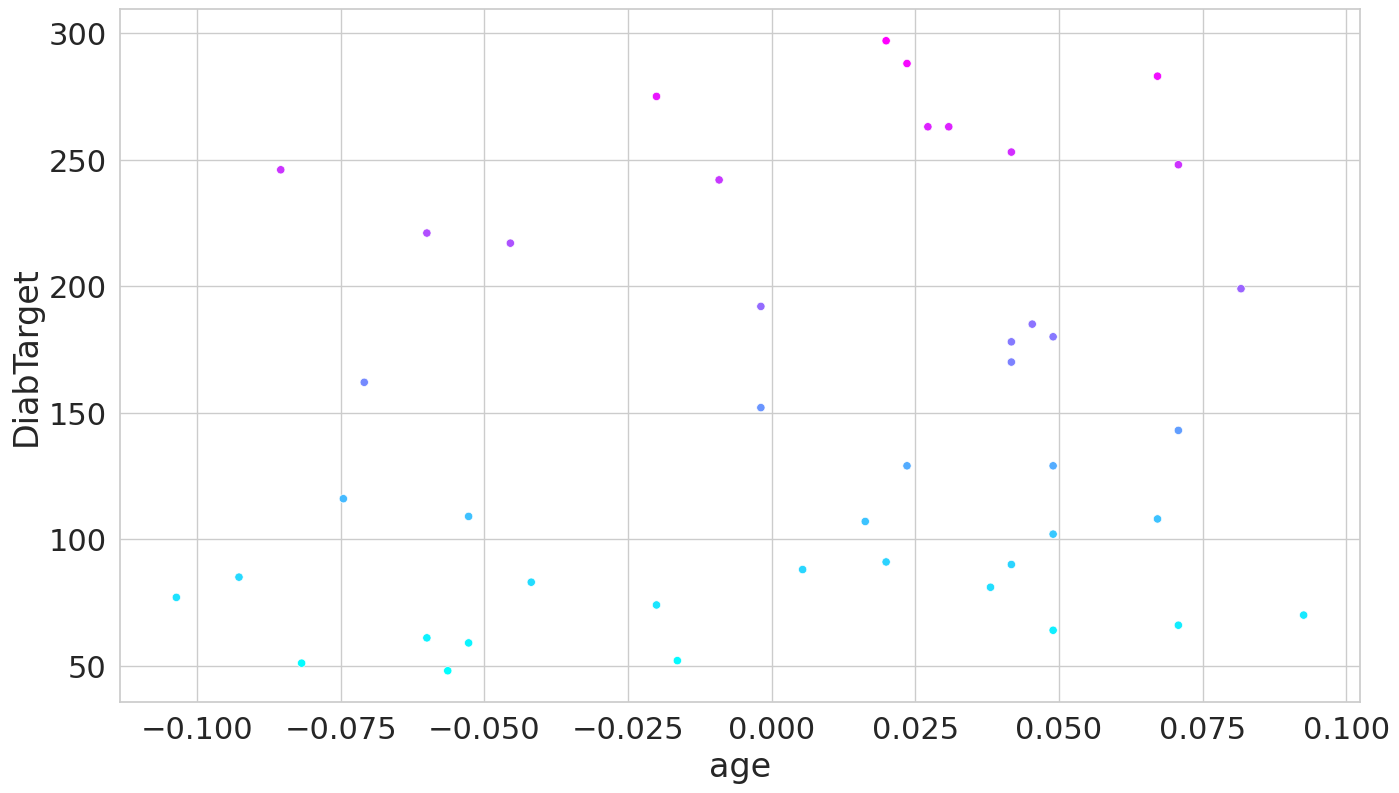

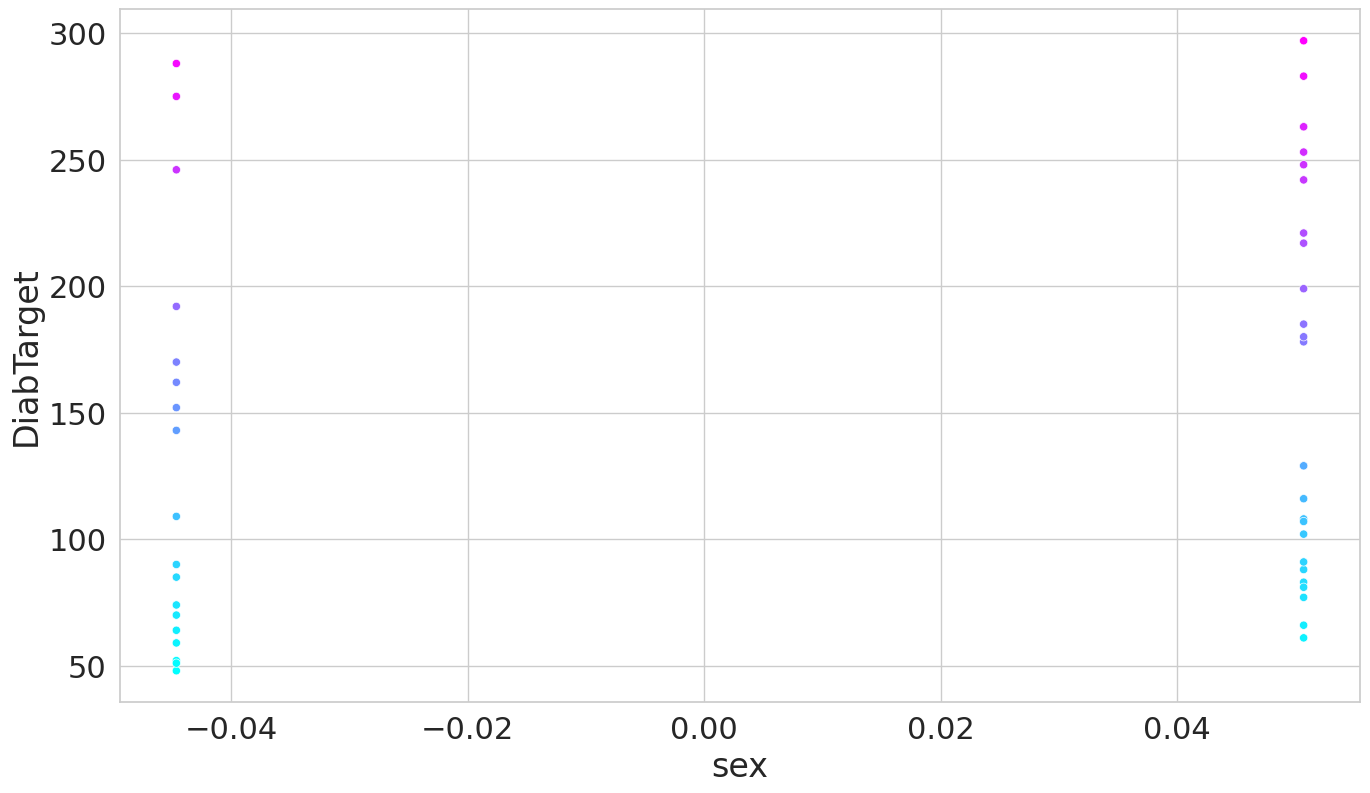

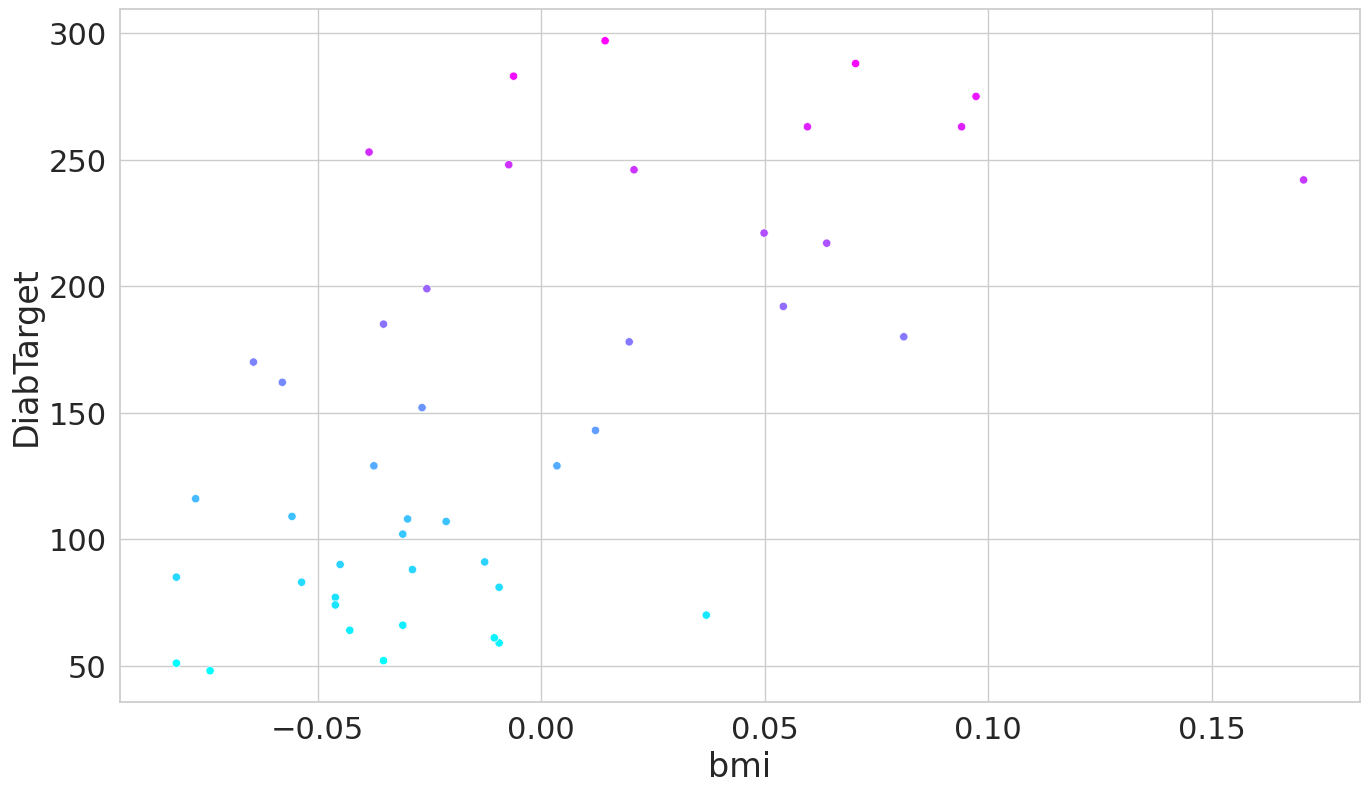

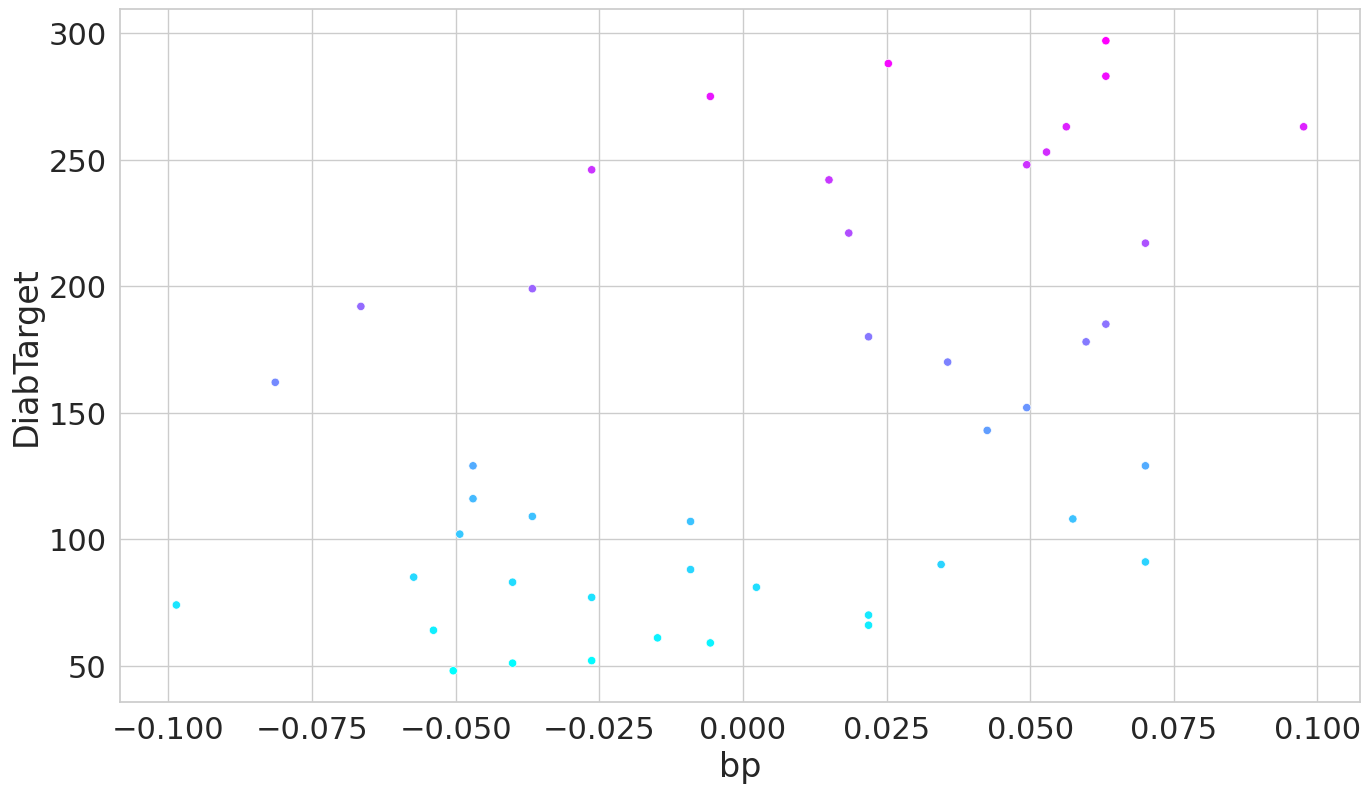

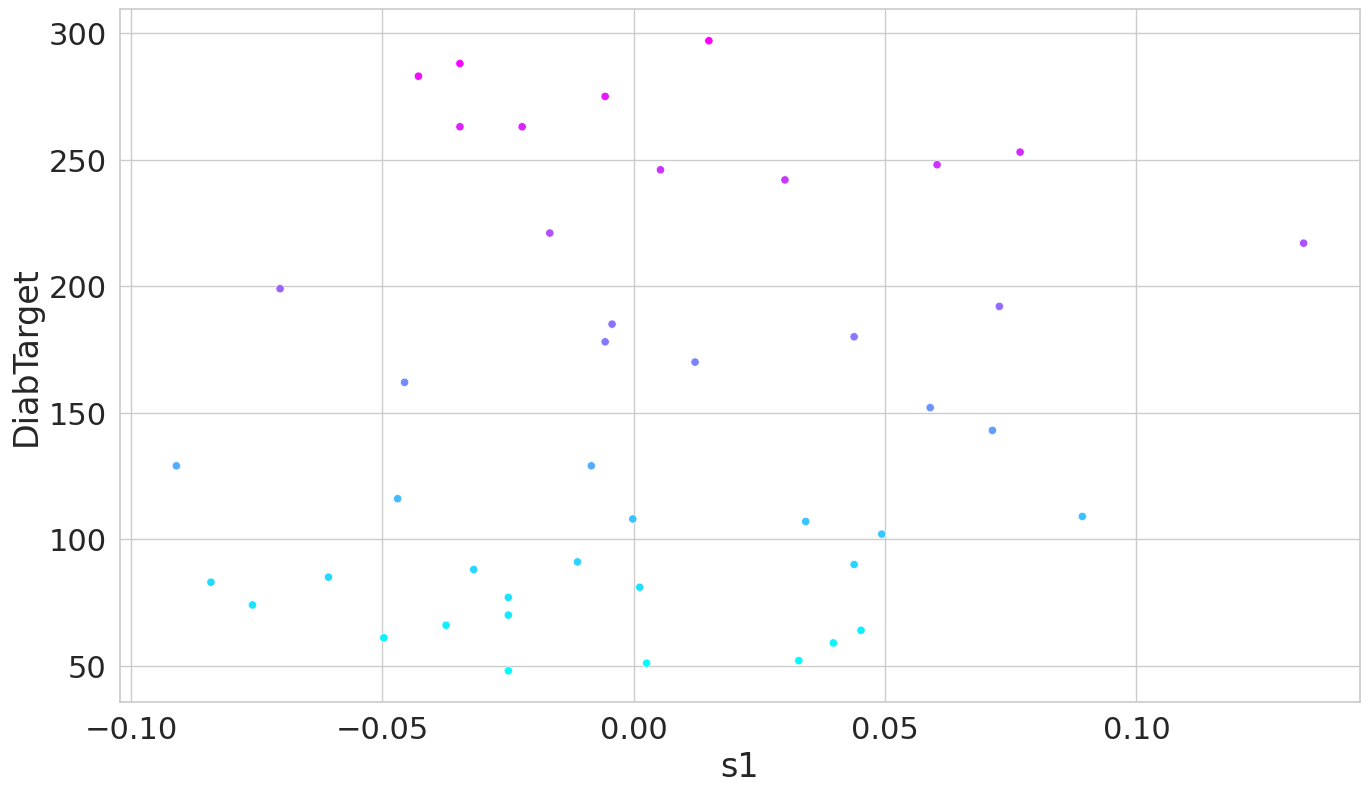

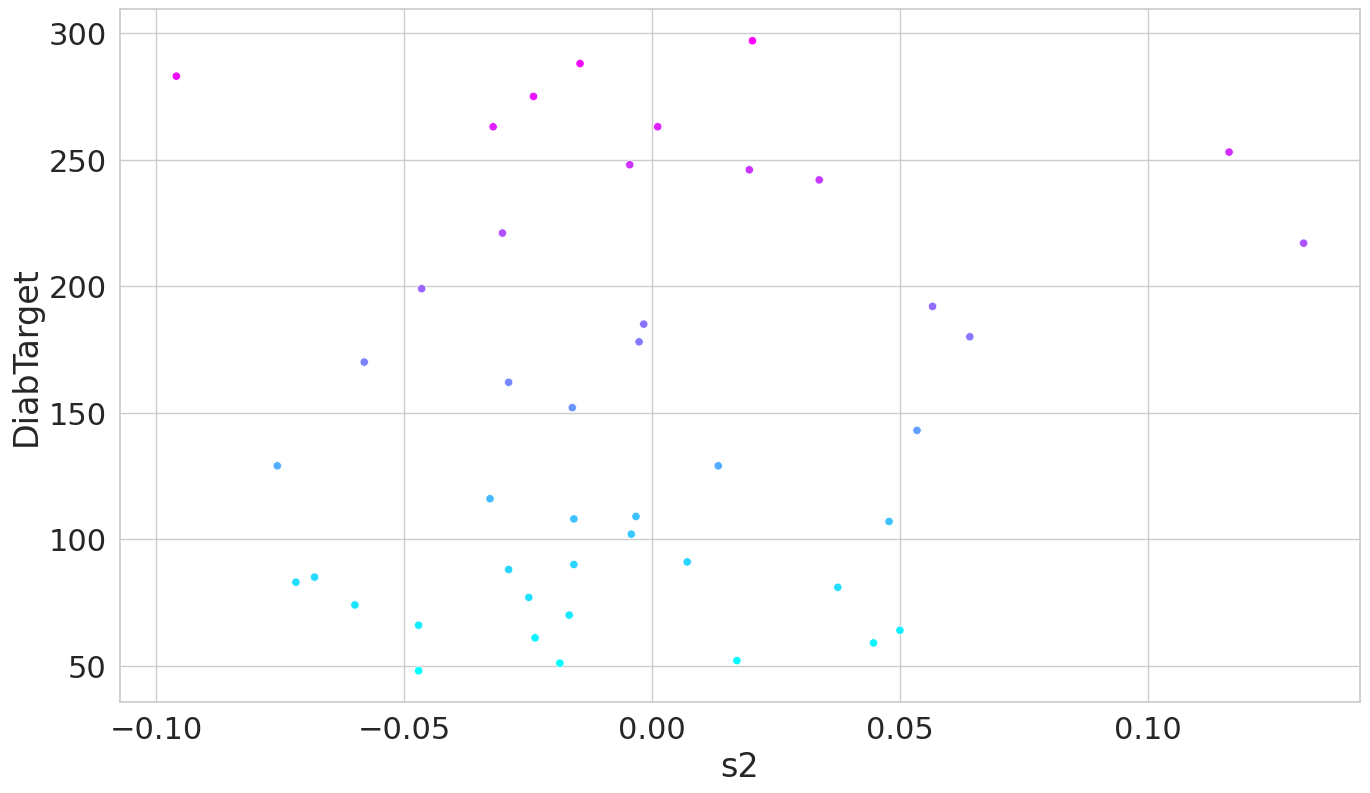

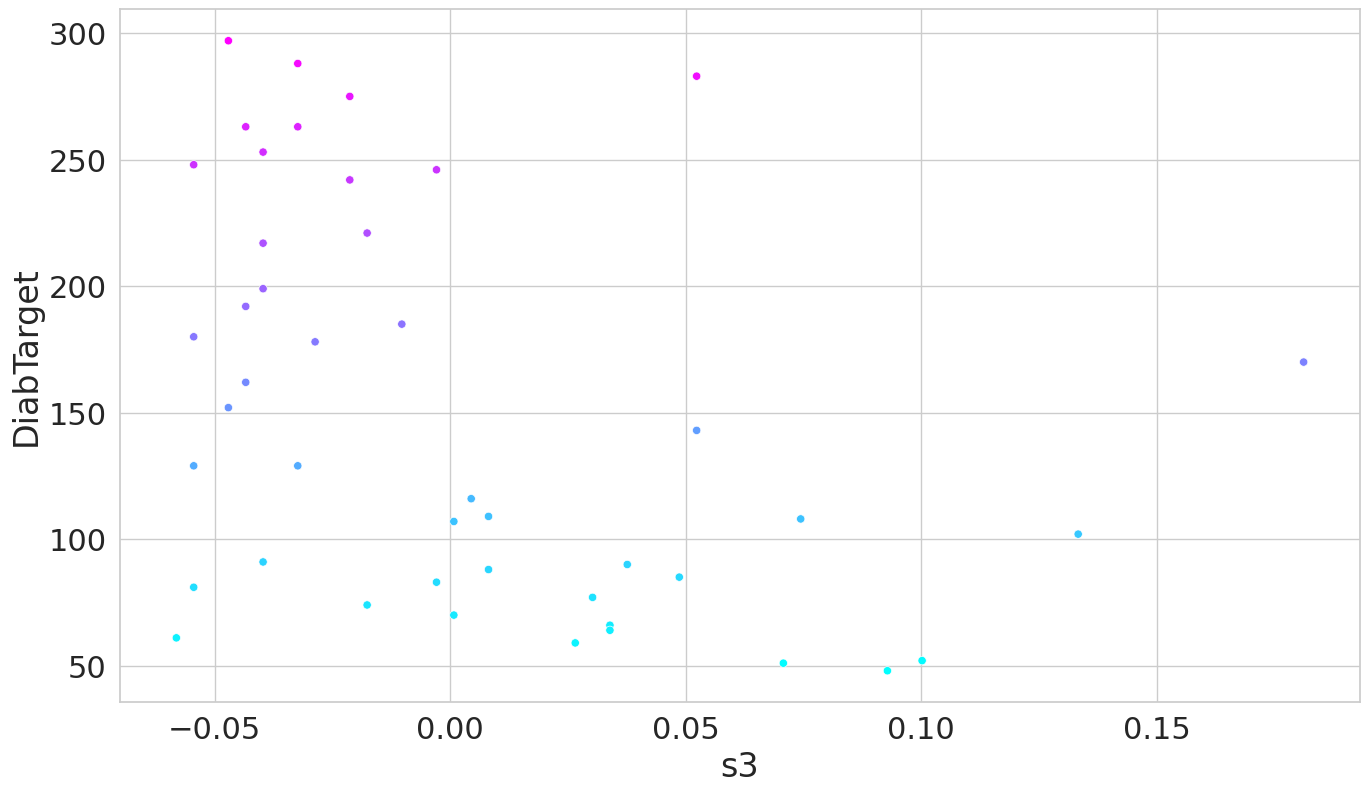

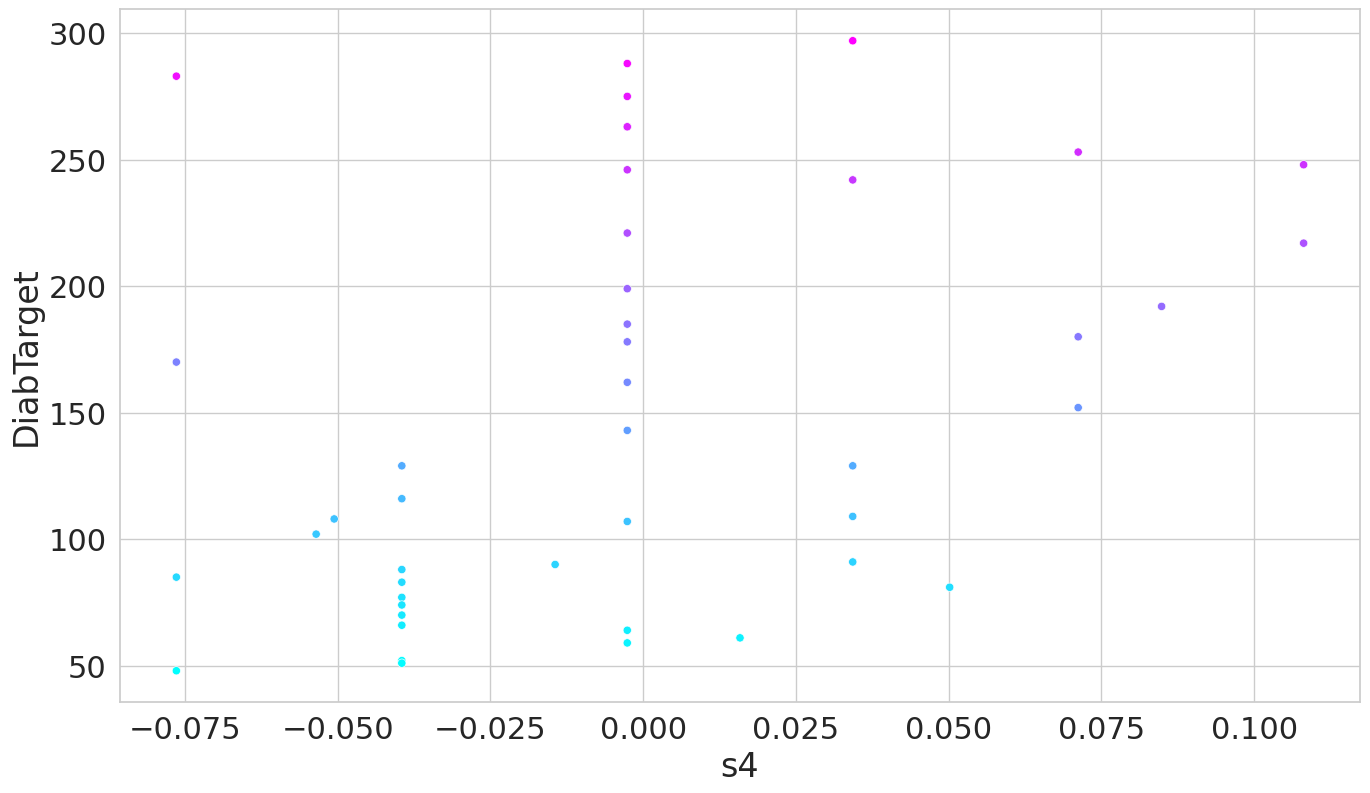

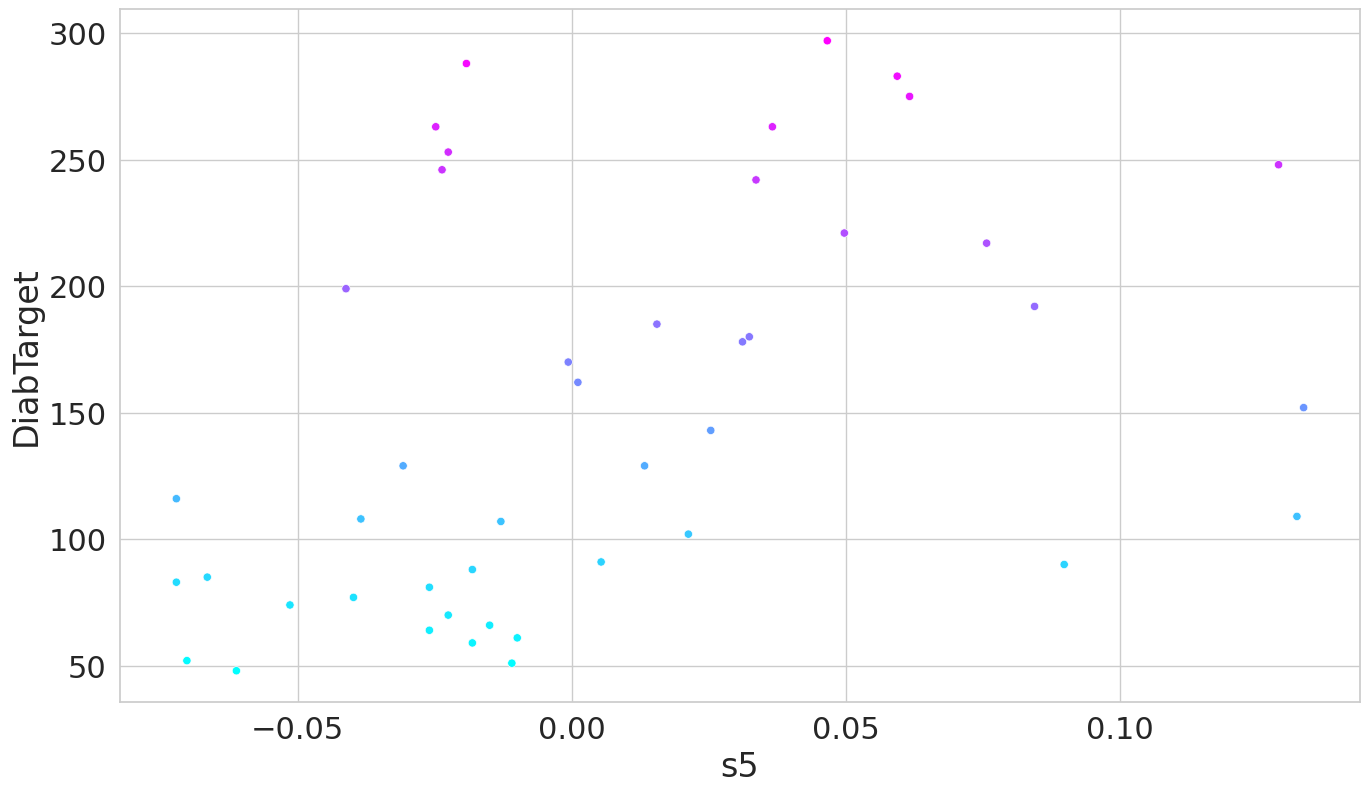

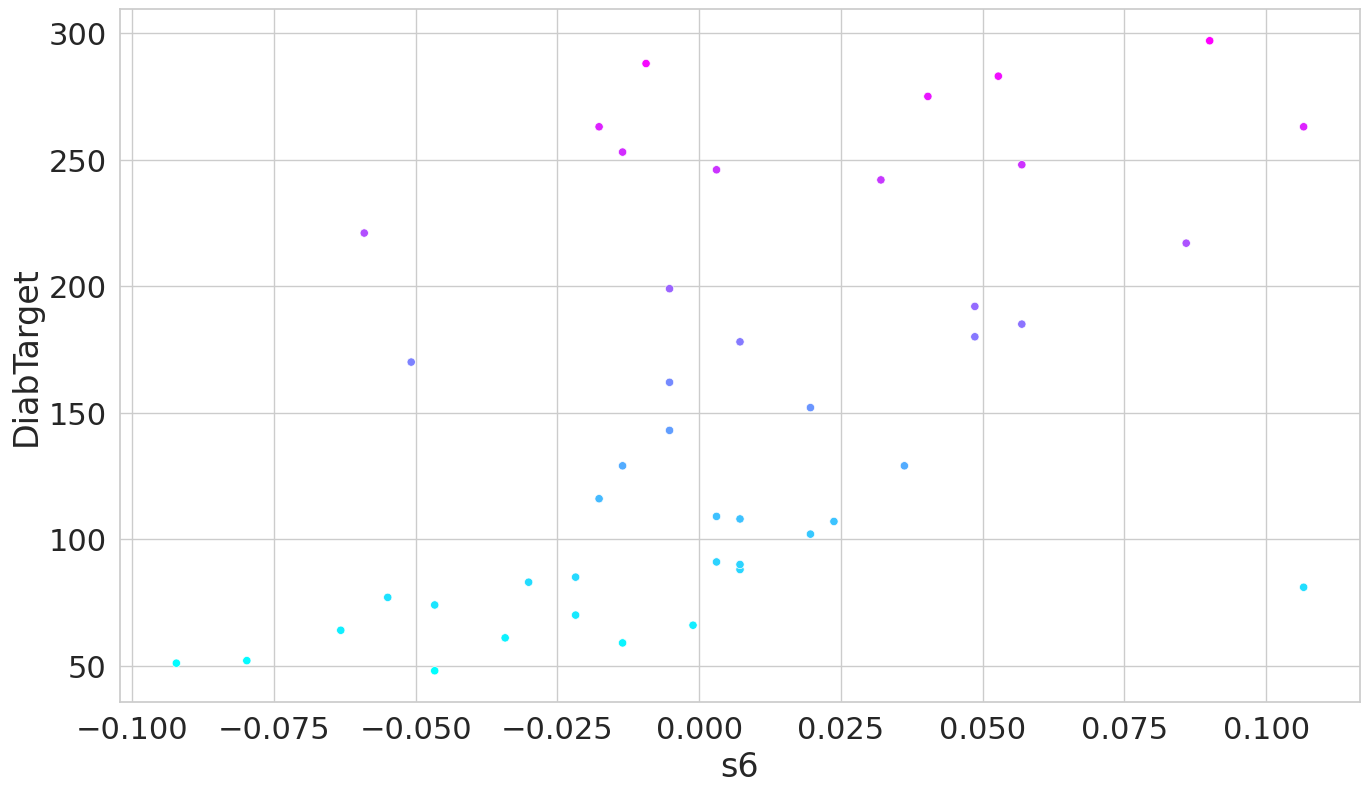

In [21]:
sample_df = diab_df.sample(frac=0.1, random_state=17)
for feature in diab.feature_names:
    plt.figure(figsize=(16,9))
    sns.scatterplot(data=sample_df, x=feature, y='DiabTarget', hue='DiabTarget', palette='cool', legend=False)

# 15.5.4 Splitting the data

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diab.data, diab.target, random_state=11)

X_train.shape

X_test.shape


(111, 10)

# 15.5.5 Training the Model

In [28]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [29]:
for i, name in enumerate(diab.feature_names):
  print(f'{name:>10}: {linear_regression.coef_[i]}')


linear_regression.intercept_

       age: -60.21981405677291
       sex: -266.45705232203574
       bmi: 523.0634112596993
        bp: 310.5134699670048
        s1: -336.1614738106944
        s2: 137.3392923842451
        s3: -131.13923283453653
        s4: -1.1492348017315557
        s5: 622.3286855688128
        s6: 60.466457691682535


152.22822762230342

# 15.5.6 Testing the Model

In [31]:
predicted = linear_regression.predict(X_test)
expected = y_test

print(predicted[:5])
print(expected[:5])

[115.46474836  83.4585369  160.77727376 187.65710274  72.72122197]
[ 79.  55. 109. 178.  39.]


# 15.5.7 Visualizing Expected vs Predicted

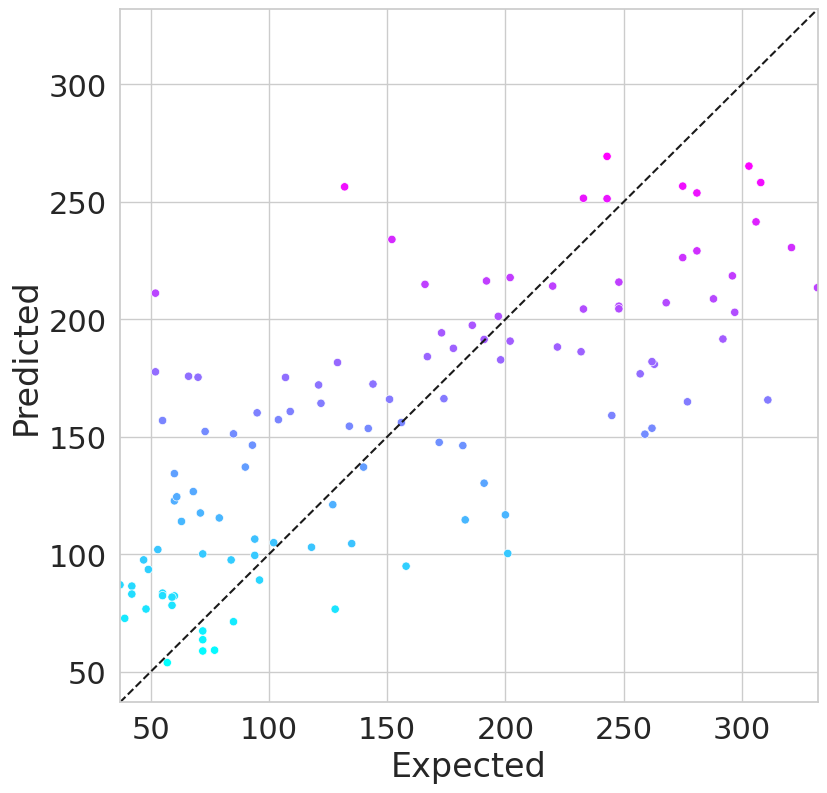

In [32]:
df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize=(9,9))
axes = sns.scatterplot(data=df, x='Expected', y='Predicted', hue='Predicted', palette='cool', legend=False)

start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())
axes.set_xlim(start, end)
axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')

# 15.5.8 Regression Model Metrics

In [33]:
from sklearn import metrics

print(metrics.r2_score(y_test, predicted))

print(metrics.mean_squared_error(y_test, predicted))

0.5322429620529407
3458.2307025173577


# 15.5.9 Choosing the Best Model

In [34]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

estimators = {
  'LinearRegression': linear_regression,
  'ElasticNet': ElasticNet(),
  'Lasso': Lasso(),
  'Ridge': Ridge()
}

In [35]:
from sklearn.model_selection import KFold, cross_val_score

for estimator_name, estimator_object in estimators.items():
  kfold = KFold(n_splits=10, random_state=11, shuffle=True)
  scores = cross_val_score(estimator=estimator_object, X=diab.data, y=diab.target, cv=kfold, scoring='r2')
  print(f'{estimator_name:>16}: ' +
        f'mean of r2 scores={scores.mean():.3f}')

LinearRegression: mean of r2 scores=0.475
      ElasticNet: mean of r2 scores=-0.002
           Lasso: mean of r2 scores=0.339
           Ridge: mean of r2 scores=0.421


Based off this result, it appears linear regression and ridge best fit this dataset